In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.optimize import curve_fit
sns.set(font="Serif",font_scale=1.2)

In [12]:
rv_data = pd.read_csv('Data/smc-obs40434-2857_fxcor_results.dat',delimiter="\s+")

In [13]:
rv_data

,hjd_ref,hjd_obs,hjd_diff,spec_line,vrel,verr,tdr
0,2.458867e+06,2.458867e+06,0.00000,HeII_5411,-0.0001,0.000,6.058E7
1,2.458867e+06,2.458867e+06,0.00000,HeII_4686,-0.0000,0.000,5.179E7
2,2.458867e+06,2.458867e+06,0.00000,HeII_4542,-0.0001,0.000,4.526E7
3,2.458867e+06,2.458867e+06,0.00000,HeII_4201,-0.0002,0.000,4.310E7
4,2.458867e+06,2.458867e+06,0.00000,HeII_4026,-0.0000,0.000,1.547E8
...,...,...,...,...,...,...,...
63,2.458867e+06,2.458839e+06,-28.00119,HeIIH_blend,58.1072,10.615,44.83
64,2.458867e+06,2.458839e+06,-28.00119,HeIIH_blend_lite,57.6163,9.650,49.90
65,2.458867e+06,2.458839e+06,-28.00119,All_lines,68.9178,15.805,41.28
66,2.458867e+06,2.458839e+06,-28.00119,All_lines_lite,73.2606,12.713,49.15


In [15]:
HeII_4026 = rv_data[rv_data['spec_line'] == 'HeII_4026']
HeII_4026

,hjd_ref,hjd_obs,hjd_diff,spec_line,vrel,verr,tdr
4,2.458867e+06,2.458867e+06,0.00000,HeII_4026,-0.0000,0.000,1.547E8
21,2.458867e+06,2.458841e+06,-25.92763,HeII_4026,-267.3130,4.813,26.34
38,2.458867e+06,2.458840e+06,-26.89479,HeII_4026,-704.6063,5.932,18.03
55,2.458867e+06,2.458839e+06,-28.00119,HeII_4026,211.9847,4.429,36.35


In [72]:
def funcee(x,a,b):
    return a * np.sin(x) + b

popt, pcov = curve_fit(funcee, HeII_4026['hjd_diff'][1:],HeII_4026['vrel'][1:])

date = np.arange(-29,-24,0.1)
vel = funcee(date,popt[0],popt[1])

(-29.0, -24.0)

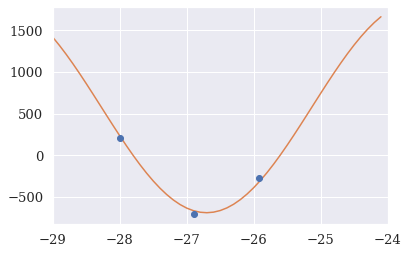

In [76]:
plt.figure()
plt.errorbar(HeII_4026['hjd_diff'].values.astype(float),HeII_4026['vrel'].values.astype(float),yerr=HeII_4026['verr'].values.astype(float),marker="o",ls="None")
plt.plot(date,vel)
plt.xlim(-29,-24)